# Word Sense Disambiguation

## Lesk (original method)

In [90]:
from nltk.wsd import lesk
from nltk import word_tokenize

In [91]:
# sample text and word to disambiguate
samples = [('The fruits on that plant have ripened', 'n'), 
           ('He finally reaped the fruit of his hard work as he won the race', 'n')]

In [92]:
word = 'fruit'

In [93]:
# perform word sense disambiguation
for sentence, pos_tag in samples:
    word_syn = lesk(word_tokenize(sentence.lower()), word, pos_tag)
    print('Sentence:', sentence)
    print('Word synset:', word_syn)
    print('Corresponding definition:', word_syn.definition())
    print()

Sentence: The fruits on that plant have ripened
Word synset: Synset('fruit.n.01')
Corresponding definition: the ripened reproductive body of a seed plant

Sentence: He finally reaped the fruit of his hard work as he won the race
Word synset: Synset('fruit.n.03')
Corresponding definition: the consequence of some effort or action



In [6]:
# sample text and word to disambiguate
samples = [('Lead is a very soft, malleable metal', 'n'), 
           ('John is the actor who plays the lead in that movie', 'n'), 
           ('This road leads to nowhere', 'v')]

In [7]:
word = 'lead'

In [8]:
# perform word sense disambiguation
for sentence, pos_tag in samples:
    word_syn = lesk(word_tokenize(sentence.lower()), word, pos_tag)
    print('Sentence:', sentence)
    print('Word synset:', word_syn)
    print()

Sentence: Lead is a very soft, malleable metal
Word synset: Synset('lead.n.02')

Sentence: John is the actor who plays the lead in that movie
Word synset: Synset('star.n.04')

Sentence: This road leads to nowhere
Word synset: Synset('run.v.23')



In [16]:
# sample text and word to disambiguate
samples = [('Their weapons were the bow and arrow and stones.', 'n'), 
           ('Jetr said nothing but offered a small bow of his head.', 'v')]

In [17]:
word = 'bow'

In [19]:
# perform word sense disambiguation
for sentence, pos_tag in samples:
    word_syn = lesk(word_tokenize(sentence.lower()), word, pos_tag)
    print('Sentence:', sentence)
    print('Word synset:', word_syn)
    print('Word synset definition:', word_syn.definition())    
    print()

Sentence: Their weapons were the bow and arrow and stones.
Word synset: Synset('bow.n.04')
Word synset definition: a weapon for shooting arrows, composed of a curved piece of resilient wood with a taut cord to propel the arrow

Sentence: Jetr said nothing but offered a small bow of his head.
Word synset: Synset('bow.v.03')
Word synset definition: bend the head or the upper part of the body in a gesture of respect or greeting



#### You can see how we use the Lesk algorithm to get the correct word sense for the word we are disambiguating based on its usage and context in each document. 
#### This tells you how fruit can mean both an entity that is consumed as well as some consequence one faces on applying efforts. 
#### We also see how lead can mean the soft metal, causing something/someone to go somewhere, or even an actor who plays the main role in a play or movie.

### Lesk (simple lesk)
#### pip install pywsd

In [56]:
from pywsd.lesk import simple_lesk

Warming up PyWSD (takes ~10 secs)... took 4.6138927936553955 secs.


In [62]:
sent = 'I went to the bank to deposit my money'
ambiguous = 'bank'
answer = simple_lesk(sent, ambiguous, pos='n')
print(answer)
print(answer.definition())

Synset('depository_financial_institution.n.01')
a financial institution that accepts deposits and channels the money into lending activities


### For all-words WSD

In [63]:
from pywsd import disambiguate
from pywsd.similarity import max_similarity as maxsim

In [65]:
sentence = 'I went to the bank to deposit my money'

In [66]:
disambiguate(sentence)

[('I', None),
 ('went', Synset('run_low.v.01')),
 ('to', None),
 ('the', None),
 ('bank', Synset('depository_financial_institution.n.01')),
 ('to', None),
 ('deposit', Synset('deposit.v.02')),
 ('my', None),
 ('money', Synset('money.n.03'))]

In [68]:
disambiguate(sentence, algorithm=maxsim, similarity_option='wup', keepLemmas=True)

[('I', 'i', None),
 ('went', 'go', Synset('travel.v.01')),
 ('to', 'to', None),
 ('the', 'the', None),
 ('bank', 'bank', None),
 ('to', 'to', None),
 ('deposit', 'deposit', Synset('deposit.v.02')),
 ('my', 'my', None),
 ('money', 'money', None)]

## Exercise 1
### Use your imagination and write a few sentences 
### Look at the difference when you use all-words, lesk and simple_lesk
### a) comment on the obtained synsets and b) time it took

In [70]:
# your implementation

# Named Entities

In [71]:
# sample document
text = """
Bayern Munich, or FC Bayern, is a German sports club based in Munich,
Bavaria, Germany. It is best known for its professional football team,
which plays in the Bundesliga, the top tier of the German football
league system, and is the most successful club in German football
history, having won a record 26 national titles and 18 national cups.
FC Bayern was founded in 1900 by eleven football players led by Franz John.
Although Bayern won its first national championship in 1932, the club
was not selected for the Bundesliga at its inception in 1963. The club
had its period of greatest success in the middle of the 1970s when,
under the captaincy of Franz Beckenbauer, it won the European Cup three
times in a row (1974-76). Overall, Bayern has reached ten UEFA Champions
League finals, most recently winning their fifth title in 2013 as part
of a continental treble.
"""

In [78]:
import nltk
import pandas as pd
import re

In [74]:
def normalize_corpus(corpus, lemmatize=True, only_text_chars=False, tokenize=False):
    normalized_corpus = []
    for text in corpus:
        text = html_parser.unescape(text)
        text = expand_contractions(text, CONTRACTION_MAP)
        if lemmatize:
            text = lemmatize_text(text)
        else:
            text = text.lower()
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        if only_text_chars:
            text = keep_text_characters(text)
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
        else:
            normalized_corpus.append(text)
        return normalized_corpus

In [76]:
def parse_document(document):
    document = re.sub('\n', ' ', document)
    if isinstance(document, str):
        document = document
    elif isinstance(document, unicode):
        return unicodedata.normalize('NFKD', document).encode('ascii', 'ignore')
    else:
        raise ValueError('Document is not string or unicode!')
    document = document.strip()
    sentences = nltk.sent_tokenize(document)
    sentences = [sentence.strip() for sentence in sentences]
    return sentences

In [80]:
# tokenize sentences
sentences = parse_document(text)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

In [87]:
#print(tokenized_sentences)

In [83]:
# tag sentences and use nltk's Named Entity Chunker
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
ne_chunked_sents = [nltk.ne_chunk(tagged) for tagged in tagged_sentences]

In [86]:
#print(tagged_sentences)

In [85]:
print(ne_chunked_sents)

[Tree('S', [Tree('GPE', [('Bayern', 'NNP')]), Tree('ORGANIZATION', [('Munich', 'NNP')]), (',', ','), ('or', 'CC'), Tree('ORGANIZATION', [('FC', 'NNP'), ('Bayern', 'NNP')]), (',', ','), ('is', 'VBZ'), ('a', 'DT'), Tree('GPE', [('German', 'JJ')]), ('sports', 'NNS'), ('club', 'NN'), ('based', 'VBN'), ('in', 'IN'), Tree('GPE', [('Munich', 'NNP')]), (',', ','), Tree('GPE', [('Bavaria', 'NNP')]), (',', ','), Tree('GPE', [('Germany', 'NNP')]), ('.', '.')]), Tree('S', [('It', 'PRP'), ('is', 'VBZ'), ('best', 'RBS'), ('known', 'VBN'), ('for', 'IN'), ('its', 'PRP$'), ('professional', 'JJ'), ('football', 'NN'), ('team', 'NN'), (',', ','), ('which', 'WDT'), ('plays', 'VBZ'), ('in', 'IN'), ('the', 'DT'), Tree('ORGANIZATION', [('Bundesliga', 'NNP')]), (',', ','), ('the', 'DT'), ('top', 'JJ'), ('tier', 'NN'), ('of', 'IN'), ('the', 'DT'), Tree('GPE', [('German', 'JJ')]), ('football', 'NN'), ('league', 'NN'), ('system', 'NN'), (',', ','), ('and', 'CC'), ('is', 'VBZ'), ('the', 'DT'), ('most', 'RBS'), ('s

In [89]:
# extract all named entities
named_entities = []
for ne_tagged_sentence in ne_chunked_sents:
    for tagged_tree in ne_tagged_sentence:
        # extract only chunks having NE labels
        if hasattr(tagged_tree, 'label'):
            entity_name = ' '.join(c[0] for c in tagged_tree.leaves()) # get NE name
            entity_type = tagged_tree.label() # get NE category
            named_entities.append((entity_name, entity_type))

In [90]:
# get unique named entities
named_entities = list(set(named_entities))

In [91]:
named_entities

[('Munich', 'GPE'),
 ('Bayern', 'PERSON'),
 ('German', 'GPE'),
 ('Overall', 'GPE'),
 ('Germany', 'GPE'),
 ('Bundesliga', 'ORGANIZATION'),
 ('European', 'ORGANIZATION'),
 ('Munich', 'ORGANIZATION'),
 ('Franz John', 'PERSON'),
 ('Bayern', 'GPE'),
 ('Franz Beckenbauer', 'PERSON'),
 ('Bavaria', 'GPE'),
 ('FC Bayern', 'ORGANIZATION'),
 ('UEFA', 'ORGANIZATION')]

In [92]:
# store named entities in a data frame
entity_frame = pd.DataFrame(named_entities, columns=['Entity Name', 'Entity Type'])

In [95]:
# display results
print(entity_frame)

          Entity Name   Entity Type
0              Munich           GPE
1              Bayern        PERSON
2              German           GPE
3             Overall           GPE
4             Germany           GPE
5          Bundesliga  ORGANIZATION
6            European  ORGANIZATION
7              Munich  ORGANIZATION
8          Franz John        PERSON
9              Bayern           GPE
10  Franz Beckenbauer        PERSON
11            Bavaria           GPE
12          FC Bayern  ORGANIZATION
13               UEFA  ORGANIZATION


#### The Named Entity Chunker identifies named entities from the preceding text document, and we extract these named entities from the tagged annotated sentences and display them in the data frame as shown. 

#### You can clearly see how it has correctly identified PERSON , ORGANIZATION , and GPE related named entities, although a few of them are incorrectly identified.

### A possibilty is to use other Taggers, for example: Stanford NER tagger on the same text and compare the results 
#### (check pp 334 and 335 from the course book and observe the differences)

#### Entity Name Entity Type
0 Franz John PERSON

1 Franz Beckenbauer PERSON

2 Germany LOCATION

3 Bayern ORGANIZATION

4 Bavaria LOCATION

5 Munich LOCATION

6 FC Bayern ORGANIZATION

7 UEFA ORGANIZATION

8 Bayern Munich ORGANIZATION

### Does this mean the second NER tagger is better?
### Not really. It depends on the type of corpus you are analyzing, and you can even build
### your own NER tagger using supervised learning by training on pre-tagged corpora

## Going back to WordNet but now to have a look at their graphs

In [79]:
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline 

def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name())
            for s1 in fn(s):
                print(s1.name())
                graph.add_node(s1.name())
                graph.add_edge(s.name(), s1.name())
                recurse(s1)

    recurse(synset)
    return graph

In [80]:
dog = wn.synset('dog.n.01')

In [81]:
graph = closure_graph(dog, lambda s: s.hypernyms())

canine.n.02
carnivore.n.01
placental.n.01
mammal.n.01
vertebrate.n.01
chordate.n.01
animal.n.01
organism.n.01
living_thing.n.01
whole.n.02
object.n.01
physical_entity.n.01
entity.n.01
domestic_animal.n.01
animal.n.01


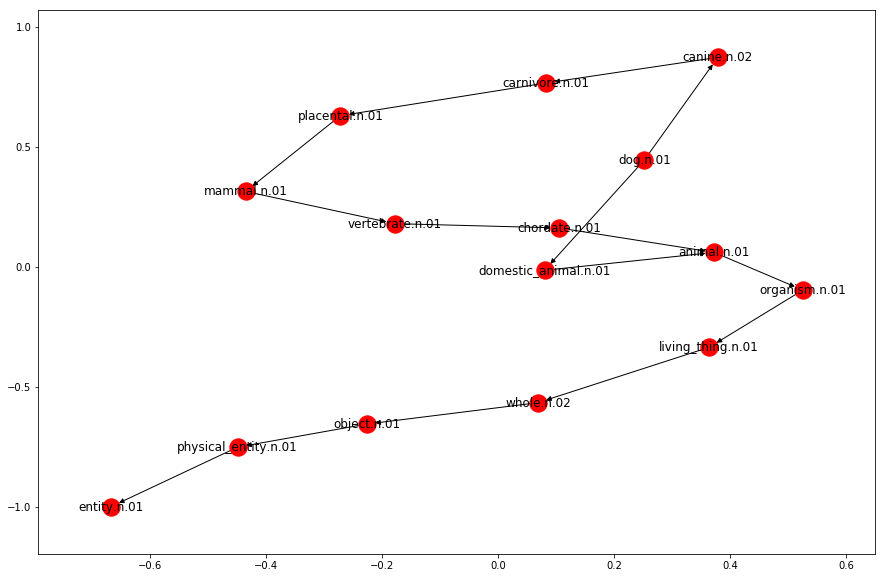

In [86]:
# larger figure size
plt.figure(3,figsize=(15,10)) 
#nx.draw_circular(graph, with_labels=True)
nx.draw_networkx(graph, with_labels=True)
plt.show()

## References

### https://github.com/alvations/pywsd